**Intro**

## Overview
The price forecasting model is designed to predict future prices based on historical data.

## Data Description
- **Dataset Used**: data_after_merge_3_col.csv that was produced from raw data from test_task's dataset
- **Source**: Internal company database.
- **Features**: day,month,year, price,	dayofweek, product_category_name_english.
- **Preprocessing Steps**: Handled missing values, normalized numerical features.

## Model Details
- **Type of Model**: ARIMA

## Training Process
- **Training Method**: Time series analysis using ARIMA.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


On the exploratory data analysis (EDA) step, I decided to construct a model base for future development and improvement. Below, you can see the process of how the data was handled.

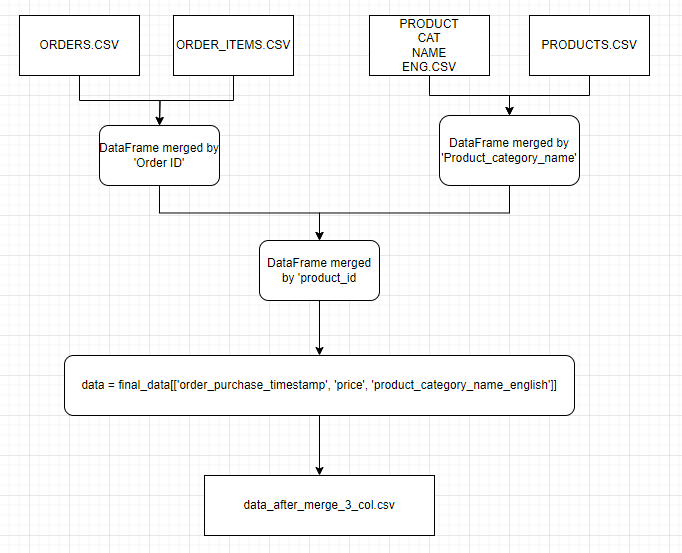

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Test_data/data_after_merge_3_col.csv')
df

,order_purchase_timestamp,price,product_category_name_english
0,2017-10-02 10:56:33,29.99,housewares
1,2017-08-15 18:29:31,29.99,housewares
2,2017-08-02 18:24:47,29.99,housewares
3,2017-10-23 23:26:46,29.99,housewares
4,2018-07-24 20:41:37,118.70,perfumery
...,...,...,...
111018,2017-08-10 21:21:07,356.00,sports_leisure
111019,2017-08-10 21:21:07,356.00,sports_leisure
111020,2017-12-20 09:52:41,55.90,musical_instruments
111021,2017-03-09 09:54:05,72.00,health_beauty


In [4]:
data=df.copy()
keras_data = df.copy()

In [5]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

In [6]:
daily_data = data.groupby(data['order_purchase_timestamp'].dt.date)['price'].sum().reset_index()
daily_data['order_purchase_timestamp'] = pd.to_datetime(daily_data['order_purchase_timestamp'])
daily_data.set_index('order_purchase_timestamp', inplace=True)

In [7]:
train_data = daily_data[:-7]
test_data = daily_data[-7:]


In [8]:
#Adding new features to help model better understand trends
def create_features(df):
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    return df

train_features = create_features(train_data)
test_features = create_features(test_data)

<ipython-input-8-3315add86d46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df.index.day
<ipython-input-8-3315add86d46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
<ipython-input-8-3315add86d46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [9]:
X_train = train_features.drop(columns=['price'])
y_train = train_features['price']
X_test = test_features.drop(columns=['price'])
y_test = test_features['price']

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Price Forecasting Model

## Overview
The price forecasting model is designed to predict future prices based on historical data.

## Data Description
- **Dataset Used**: Test-task dataset
- **Source**: Internal company database.
- **Features**: Date, sales amount, product category, promotions.
- **Preprocessing Steps**: Handled missing values, normalized numerical features.

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [12]:
# I'm Using ARIMA here to predcit future values
model_arima = ARIMA(train_data['price'], order=(5,1,0))
model_arima_fit = model_arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
y_pred_arima = model_arima_fit.forecast(steps=7)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [14]:
from scipy import stats

In [15]:
def confidence_interval(predictions, confidence=0.95):
    mean, std = np.mean(predictions), np.std(predictions)
    interval = stats.norm.interval(confidence, loc=mean, scale=std)
    return interval

In [16]:
conf_interval_arima = confidence_interval(y_pred_arima)

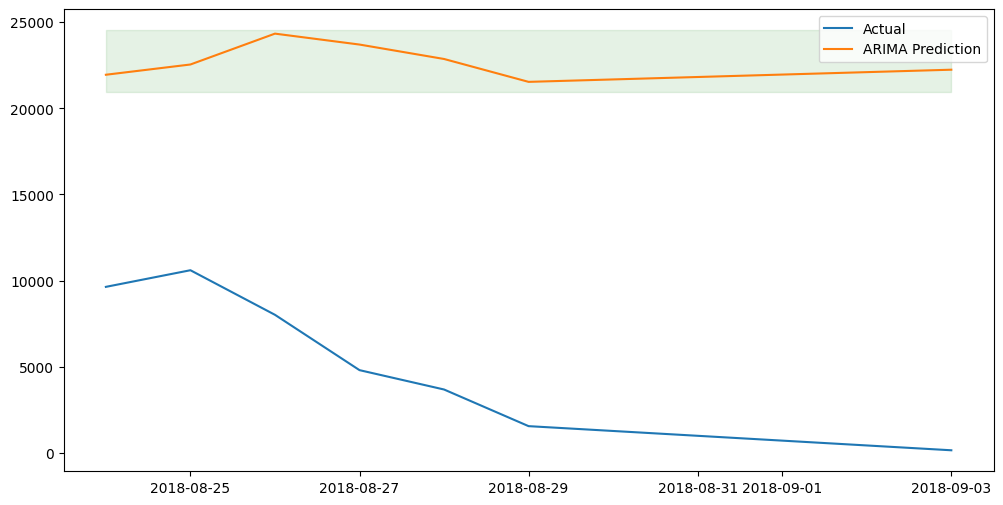

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual')
plt.plot(test_data.index, y_pred_arima, label='ARIMA Prediction')
plt.fill_between(test_data.index, conf_interval_arima[0], conf_interval_arima[1], color='g', alpha=0.1)
plt.legend()
plt.show()

In [18]:
# Forecasting for 14 days
future_dates = pd.date_range(start=test_data.index[-1], periods=14, freq='D')
future_features = create_features(pd.DataFrame(index=future_dates))
future_features_scaled = scaler.transform(future_features)

future_pred_arima = model_arima_fit.forecast(steps=14)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


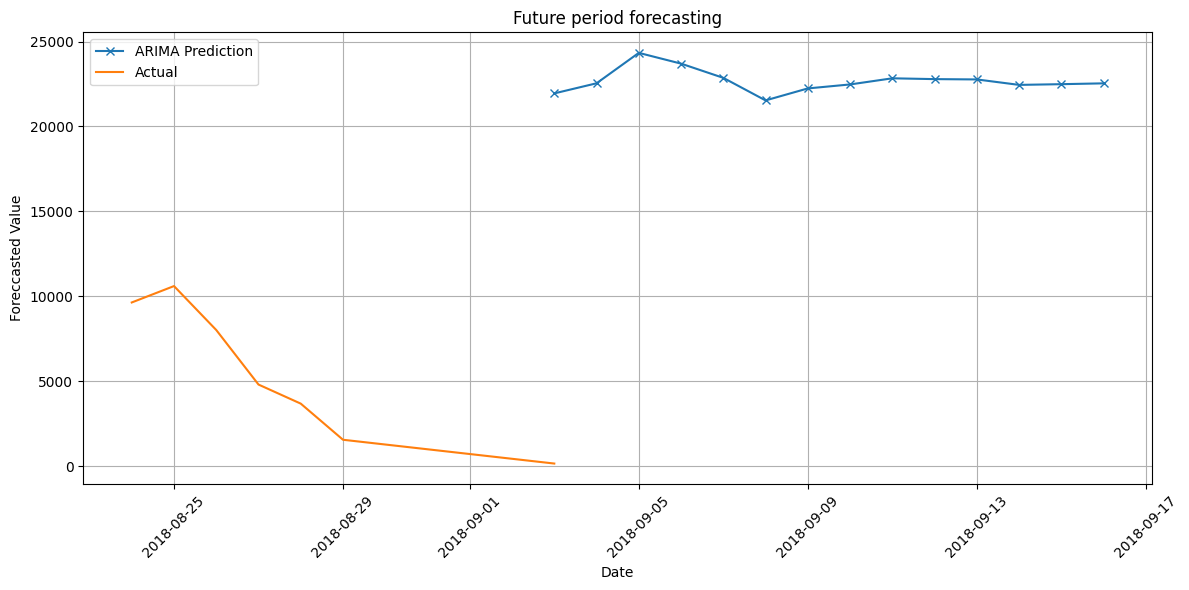

In [19]:
plt.figure(figsize=(12, 6))

plt.plot(future_dates, future_pred_arima, label='ARIMA Prediction', marker='x')

plt.plot(test_data.index, y_test, label='Actual')

plt.title('Future period forecasting')
plt.xlabel('Date')
plt.ylabel('Foreccasted Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Overview
This model created as a classic machine learning as required by test task

## Data Description
- **Dataset Used**: data_after_merge_3_col.csv that was produced from raw data from test_task's dataset
- **Source**: Internal company database.
- **Features**: order_purchase_timestamp,	price,	product_category_name_english.
- **Preprocessing Steps**: Handled missing values, normalized numerical features.

## Model Details
- **Type of Model**: LSTM Neural Network

- **Parameters**:
  - Optimizer: Adam
  - Loss Function: Mean Squared Error (MSE)

## Training Process
- **Training Method**: Supervised learning with time series data.
- **Batch Size**: 32
- **Epochs**: 6
- **Validation Split**: 20% of the data for validation



In [20]:
# Transforming dates to DateTime
keras_data['order_purchase_timestamp'] = pd.to_datetime(keras_data['order_purchase_timestamp'])
#Prepearing features
main_keras = keras_data[['order_purchase_timestamp', 'price', 'product_category_name_english']]


In [21]:
median = main_keras['price'].median()
std = main_keras['price'].std()
outliers = (main_keras['price'] - median).abs() > std
main_keras[outliers] = np.nan
main_keras['price'].fillna(median, inplace=True)

main_keras

,order_purchase_timestamp,price,product_category_name_english
0,2017-10-02 10:56:33,29.99,housewares
1,2017-08-15 18:29:31,29.99,housewares
2,2017-08-02 18:24:47,29.99,housewares
3,2017-10-23 23:26:46,29.99,housewares
4,2018-07-24 20:41:37,118.70,perfumery
...,...,...,...
111018,NaT,74.99,NaN
111019,NaT,74.99,NaN
111020,2017-12-20 09:52:41,55.90,musical_instruments
111021,2017-03-09 09:54:05,72.00,health_beauty


In [22]:
main_keras.dropna(subset = ['order_purchase_timestamp','product_category_name_english'], inplace = True)

In [23]:
scaler_keras = MinMaxScaler()
scaled_data = scaler_keras.fit_transform(main_keras[['price']])

In [24]:
def create_sequences(data, seq_length):
  X = []
  y = []
  for i in range(len(data) - seq_length):
    X.append(data[i:i + seq_length])
    y.append(data[i + seq_length])
  return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [26]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=y_train.shape[1]))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.fit(X_train, y_train, epochs=6, batch_size=32, validation_split=0.2)

Epoch 1/6
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.0303 - val_loss: 0.0245
Epoch 2/6
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0258 - val_loss: 0.0246
Epoch 3/6
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0255 - val_loss: 0.0240
Epoch 4/6
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.0248 - val_loss: 0.0239
Epoch 5/6
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.0251 - val_loss: 0.0239
Epoch 6/6
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.0247 - val_loss: 0.0240


In [28]:
loss = model.evaluate(X_test, y_test)

637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0240


In [29]:
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_keras.inverse_transform(y_pred)
y_test_rescaled = scaler_keras.inverse_transform(y_test)
results = pd.DataFrame({ 'Actual': y_test_rescaled.flatten(), 'Predicted': y_pred_rescaled.flatten() })

637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [30]:
results

,Actual,Predicted
0,18.00,55.988922
1,224.99,68.344902
2,159.00,151.187241
3,49.00,63.569305
4,29.67,184.359833
...,...,...
20351,78.00,59.901508
20352,52.50,64.008766
20353,131.99,126.790871
20354,99.99,101.784859


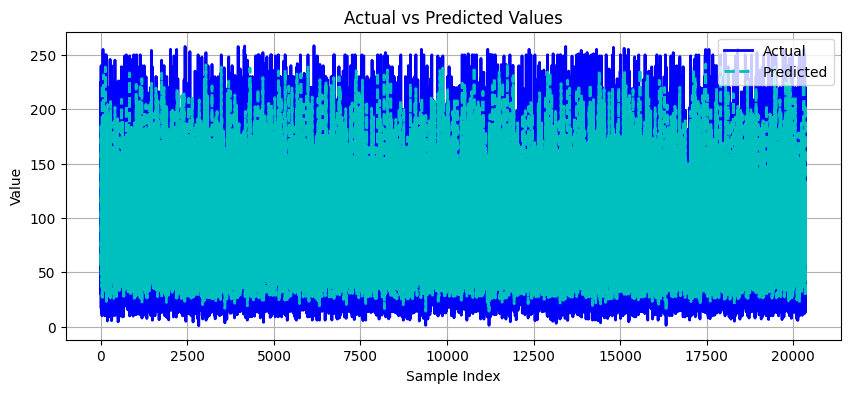

In [31]:
plt.figure(figsize=(10, 4))
plt.plot(results['Actual'], label='Actual', color='b', linewidth=2)
plt.plot(results['Predicted'], label='Predicted', color='c', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
mean_squared_error(y_test, y_pred)

0.024406267137751736

In [35]:
mean_absolute_error(y_test, y_pred)

0.10160983916815575

In [36]:
def calculate_rmse(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

In [37]:
rmse = calculate_rmse(y_test, y_pred)
print(f"RMSE: {rmse}")

RMSE: 0.1562250528492525
